In [1]:
%%time

from rbm_binary import ising
import time
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

filename = 'sarsa-rbm-frozenlake-run1_binary.pkl'

Ssize=7 #needed for minimum binary representation of the state (max - 64)
Msize=3
nhidden = 20
size=nhidden+Ssize+Msize  #30 - 0.0027

I = ising(size,Ssize,Msize)
I.initialise_wiring()

# RL
total_episodes = 2 #10000
max_steps = 100       # in Otsuka they are 250 but it's a different task
Beta = np.linspace(0,15,total_episodes)

I.SarsaLearning(total_episodes, max_steps, Beta)

# Params to save
params = {}
params['Ssize']= Ssize
params['Msize']= Msize
params['nhidden'] = nhidden
params['size'] = size
params['total_episodes'] = total_episodes
params['max_steps'] = max_steps
params['Beta'] = Beta
params['network_J'] = I.J
params['network_h'] = I.h
params['network_rewards'] = I.rewards


# Save
if not os.path.isfile(filename):
    with open(filename, 'wb') as output:
            pickle.dump(params, output, pickle.HIGHEST_PROTOCOL)
else:
    print("File already exists!")

# Output
# I.env.render()
# plt.plot(I.rewards)

Wall time: 3.98 s


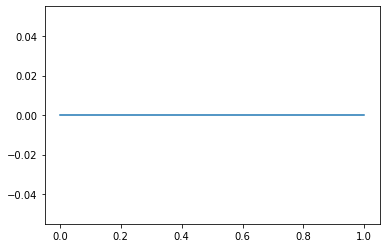

In [2]:
plt.plot(I.rewards)
